## Imports

In [1]:
# Imports
# ----------
import logging
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import arus


## Turn on logging information

In [2]:
# Turn on logging information
# ---------------------------
arus.dev.set_default_logging()


## Get the test mhealth annotation files

In [3]:
# Get the test mhealth annotation files
# -------------------------------

spades_lab = arus.dataset.load_dataset('spades_lab')
annotation_files = spades_lab['subjects']['SPADES_22']['annotations']['SPADESInLab']


## Setup stream

In [4]:
# Setup stream
# --------------
window_size = 12.8
generator = arus.generator.MhealthAnnotationFileGenerator(
    *annotation_files, buffer_size=10)
segmentor = arus.segmentor.SlidingWindowSegmentor(
    window_size=window_size, st_col=1, et_col=2)

stream = arus.Stream(generator, segmentor,
                     name='mhealth-annotation-stream', scheduler='thread')


## Start stream and read in data

In [6]:
# Start stream and read in data
# ---------------------------------
stream.start()
chunk_sizes = []
for data, context, name in stream.generate():
    print("{},{},{}".format(
        context['start_time'], context['stop_time'], data.shape[0]))
    if not data.empty:
        chunk_sizes.append(
            (data.iloc[-1, 2] - data.iloc[0, 1]) / pd.Timedelta(1, 's'))


9:37:38.600000,2016-02-09 09:37:51.400000,2
2016-02-09 09:37:51.400000,2016-02-09 09:38:04.200000,2
2016-02-09 09:38:04.200000,2016-02-09 09:38:17,0
2016-02-09 09:38:17,2016-02-09 09:38:29.800000,3
2016-02-09 09:38:29.800000,2016-02-09 09:38:42.600000,2
2016-02-09 09:38:42.600000,2016-02-09 09:38:55.400000,2
2016-02-09 09:38:55.400000,2016-02-09 09:39:08.200000,0
2016-02-09 09:39:08.200000,2016-02-09 09:39:21,1
2016-02-09 09:39:21,2016-02-09 09:39:33.800000,3
2016-02-09 09:39:33.800000,2016-02-09 09:39:46.600000,2
2016-02-09 09:39:46.600000,2016-02-09 09:39:59.400000,2
2016-02-09 09:39:59.400000,2016-02-09 09:40:12.200000,2[INFO]2020-03-25 14:30:59,601 <P18380-mhealth-annotation-stream-loading> Generator thread is stopping.

2016-02-09 09:40:12.200000,2016-02-09 09:40:25,2
2016-02-09 09:40:25,2016-02-09 09:40:37.800000,2
2016-02-09 09:40:37.800000,2016-02-09 09:40:50.600000,2
2016-02-09 09:40:50.600000,2016-02-09 09:41:03.400000,2
2016-02-09 09:41:03.400000,2016-02-09 09:41:16.200000,2

## Stop stream

In [7]:
# Stop stream
# --------------
stream.stop()


[INFO]2020-03-25 14:31:11,723 <P18380-MainThread> Stream is stopping.
[INFO]2020-03-25 14:31:11,724 <P18380-MainThread> Segmentor thread stopped.
[INFO]2020-03-25 14:31:11,825 <P18380-MainThread> Generator thread stopped.
[INFO]2020-03-25 14:31:11,828 <P18380-MainThread> Stream stopped.


## Plot the stats of the received data

The plot shows at many places, the duration of the annotation windows are not as long as the window size. This is normal, because annotations may not fill up the entire window and there are moments covered with no annotations.

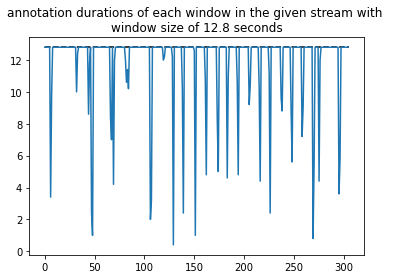

In [8]:
# Plot the stats of the received data
# -------------------------------------
# The plot shows at many places, the duration of the annotation windows are not as long as the window size. This is normal, because annotations may not fill up the entire window and there are moments covered with no annotations.
pd.Series(chunk_sizes).plot(
    title='annotation durations of each window in the given stream with \nwindow size of ' + str(window_size) + ' seconds')
fig = plt.hlines(y=window_size,
                 xmin=0,
                 xmax=len(chunk_sizes),
                 linestyles='dashed')

if __name__ == "__main__":
    plt.show()
